<a href="https://colab.research.google.com/github/whyrzky/DS-Portfolio-Projects/blob/main/Machine%20Learning%3A%20RFM%20Analysis%20using%20K-Means%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RFM Analysis PT.Global Super Store

## Introduction

Management wants to create a Loyalty Program, but needs some customer segments that have an economic impact. On the other side, management has customers based on order priority, but management wonders whether the loyalty program should be applied to customers based on order priority or not. So, management needs BI to analyze the order of priority in terms of economic value and segmentation based on other economic values.
Stakeholder wondering about:
- The basis of Order Priority
- Does the higher the priority order, impacted to the higher economic value?

Stakeholder need to suggestion:
- Giving the Analysis of RFM Segmentation, in order to targeting Loyalty Program to segmented customer, instead of Order Priority segment.

-------------------------------------------------------------------------------

Deck Presentation: [Link](https://docs.google.com/presentation/d/1CEcpdsfo8lQXTzGb9Typ7mKoZk8Lj63U/edit?usp=sharing&ouid=110784485473396982568&rtpof=true&sd=true)

Dataset: https://www.kaggle.com/datasets/apoorvaappz/global-super-store-dataset?select=Global_Superstore2.csv

# Install and Load Packages

In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial import ConvexHull

from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# Load Dataset

In [ ]:
raw_data = pd.read_csv("/content/Global_Superstore2.csv",encoding='unicode_escape',engine='python', error_bad_lines=False)
raw_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

# Data Preprocessing

In [ ]:
raw_data.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [ ]:
#delete column postal code
raw_data = raw_data.drop(columns=['Postal Code','Row ID'])

In [ ]:
raw_data.isna().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [ ]:
#Create Order Year
raw_data['Order Date'] = pd.to_datetime(raw_data['Order Date'])
raw_data['Order Year'] = pd.DatetimeIndex(raw_data['Order Date']).year

In [ ]:
#Turn Order Date and Ship Date into date type
raw_data["Order Date"] = pd.to_datetime(raw_data['Order Date'])
raw_data["Ship Date"] = pd.to_datetime(raw_data['Ship Date'])

In [ ]:
#Create Price per unit Column
raw_data['Price'] = raw_data['Sales'] / raw_data['Quantity']

In [ ]:
#Create Cost per unit Column
total_cost = raw_data['Sales'] - raw_data['Profit']
raw_data['Cost'] = total_cost / raw_data['Quantity']

In [ ]:
#Rename Sales into GMV title
raw_data.rename(columns = {'Sales':'GMV'}, inplace = True)

In [ ]:
#Create Profit Margin per unit Column
raw_data['Profit Margin'] = raw_data['Profit'] / raw_data['GMV']

In [ ]:
#Creat Recency
raw_data['Order Date'].max()

Timestamp('2014-12-31 00:00:00')

In [ ]:
analysis_date = raw_data['Order Date'].max()

In [ ]:
#Recheck the data
raw_data['Order Year'].ascending=True

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Customer Name   51290 non-null  object        
 6   Segment         51290 non-null  object        
 7   City            51290 non-null  object        
 8   State           51290 non-null  object        
 9   Country         51290 non-null  object        
 10  Market          51290 non-null  object        
 11  Region          51290 non-null  object        
 12  Product ID      51290 non-null  object        
 13  Category        51290 non-null  object        
 14  Sub-Category    51290 non-null  object        
 15  Pr

In [ ]:
raw_data.isna().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
GMV               0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
Order Year        0
Price             0
Cost              0
Profit Margin     0
dtype: int64

#Data Inspection

In [ ]:
#Descriptive Analysis for quantitative data
raw_data.describe()

,GMV,Quantity,Discount,Profit,Shipping Cost,Order Year,Price,Cost,Profit Margin
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915,2012.777208,71.657487,63.534799,0.047430
std,487.565361,2.278766,0.212280,174.340972,57.296804,1.098931,113.581515,99.168923,0.465667
min,0.444000,1.000000,0.000000,-6599.978000,0.000000,2011.000000,0.336000,0.544500,-4.733542
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000,11.799900,10.280000,0.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000,29.400000,25.920000,0.169178
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000,82.160000,75.937500,0.333139
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000,3773.080000,4074.926400,0.500000


In [ ]:
#Descriptive Analysis for qualitative data
raw_data[['Ship Mode','Segment','City','State','Country','Market','Region','Category','Sub-Category','Order Priority']].describe()

,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,4,3,3636,1094,147,7,13,3,17,4
top,Standard Class,Consumer,New York City,California,United States,APAC,Central,Office Supplies,Binders,Medium
freq,30775,26518,915,2001,9994,11002,11117,31273,6152,29433


In [ ]:
# Unique Value for Datatype Object Columns
empDfObj = pd.DataFrame(raw_data, columns=['Ship Mode','Order Year','Segment','City','State','Country','Market','Region','Category','Sub-Category','Order Priority'])
print("Contents of the Data: ")
print(empDfObj)

# Get a series object containing the count of unique elements
# in each column of dataframe
uniqueValues = empDfObj.nunique()
print('Count of unique value sin each column :')
print(uniqueValues)

# Unique Value for Datatype Object Columns
# Get unique elements in multiple columns
unique = pd.unique(raw_data[['Ship Mode', 'Segment','City','State','Country','Market','Region','Category','Sub-Category','Order Priority']].values.ravel('k'))
print('Unique elements in object columns :')
print(unique)

Contents of the Data: 
            Ship Mode  Order Year      Segment           City  \
0            Same Day        2012     Consumer  New York City   
1        Second Class        2013    Corporate     Wollongong   
2         First Class        2013     Consumer       Brisbane   
3         First Class        2013  Home Office         Berlin   
4            Same Day        2013     Consumer          Dakar   
...               ...         ...          ...            ...   
51285        Same Day        2014    Corporate           Kure   
51286  Standard Class        2014     Consumer        Houston   
51287        Same Day        2013  Home Office         Oxnard   
51288  Standard Class        2012  Home Office       Valinhos   
51289    Second Class        2012     Consumer       Tipitapa   

                 State        Country  Market      Region         Category  \
0             New York  United States      US        East       Technology   
1      New South Wales      Australia   

## Simple Distribution 
For each of Numerical and Categorial Data

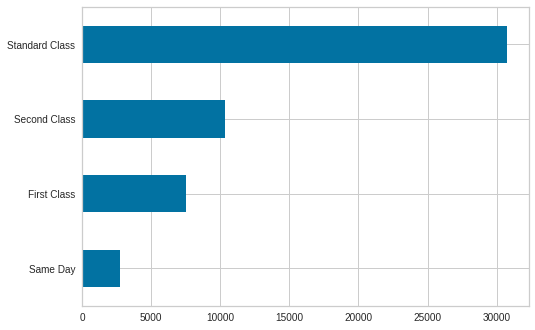

In [ ]:
raw_data['Ship Mode'].value_counts(ascending=True).plot(kind='barh')

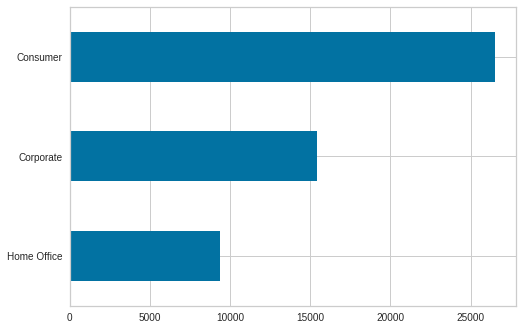

In [ ]:
raw_data['Segment'].value_counts(ascending=True).plot(kind='barh');

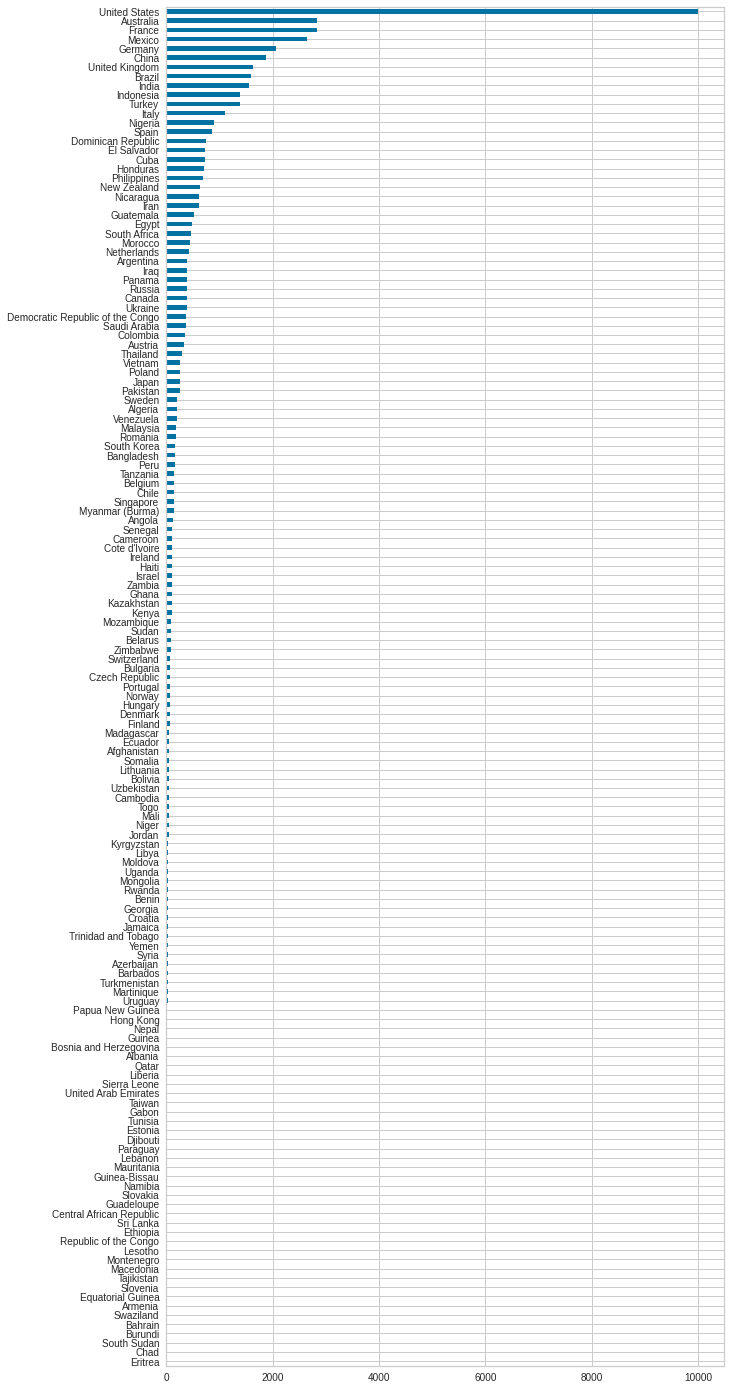

In [ ]:
plt.figure(figsize=(10,25))
raw_data['Country'].value_counts(ascending=True).plot(kind='barh');

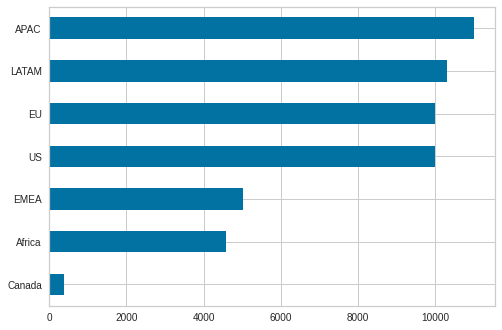

In [ ]:
raw_data['Market'].value_counts(ascending=True).plot(kind='barh');

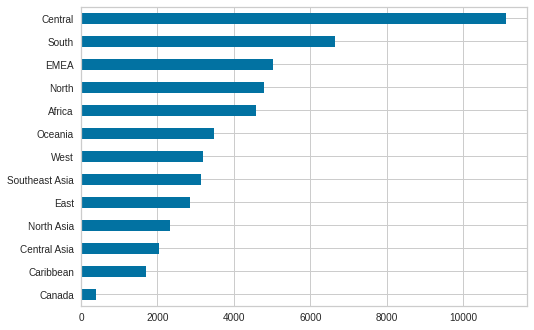

In [ ]:
raw_data['Region'].value_counts(ascending=True).plot(kind='barh');

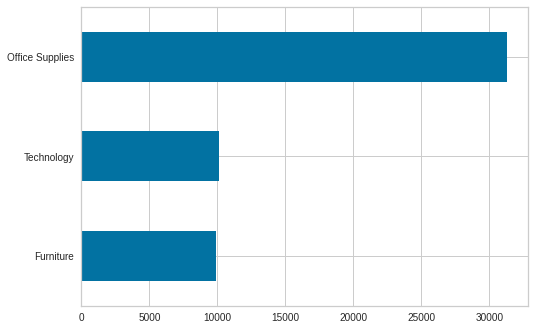

In [ ]:
raw_data['Category'].value_counts(ascending=True).plot(kind='barh');

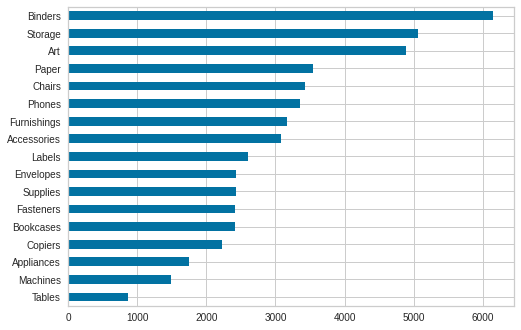

In [ ]:
raw_data['Sub-Category'].value_counts(ascending=True).plot(kind='barh');

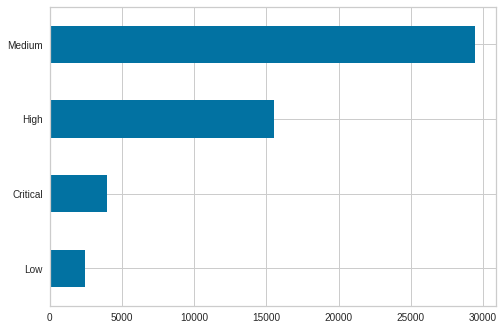

In [ ]:
raw_data['Order Priority'].value_counts(ascending=True).plot(kind='barh');

Medium order priority is the largest number of transaction lifetime. Followed by High, Critical, and Low.

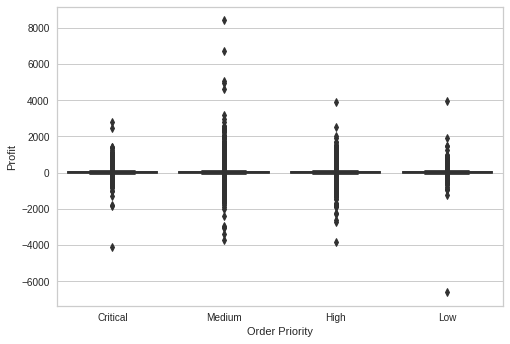

In [ ]:
sns.boxplot(x = "Order Priority", y = "Profit", data = raw_data);

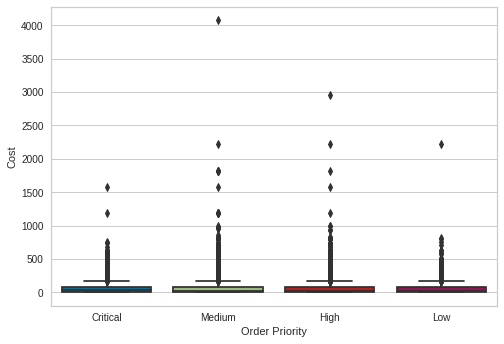

In [ ]:
sns.boxplot(x = "Order Priority", y = "Cost", data = raw_data);

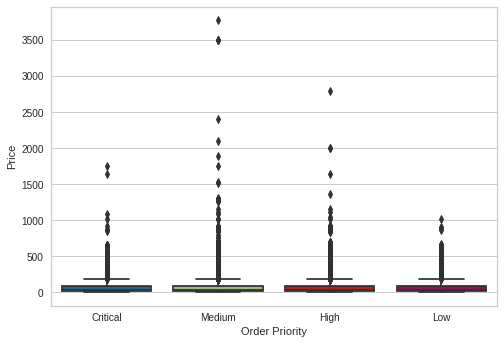

In [ ]:
sns.boxplot(x = "Order Priority", y = "Price", data = raw_data);

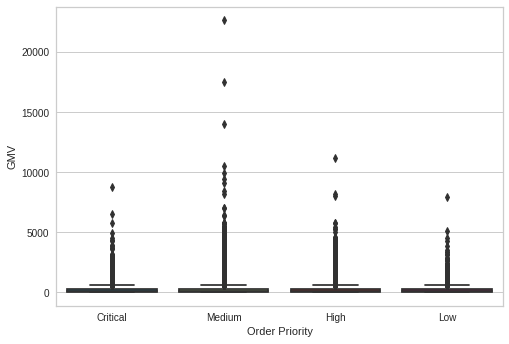

In [ ]:
sns.boxplot(x = "Order Priority", y = "GMV", data = raw_data);

# Exploratory Data Analysis (EDA)

referensi EDA:
https://github.com/arienugroho050396/Customer-Personality-Analysis/blob/main/Customer%20Personality%20Analysis%20Fix.ipynb

In [ ]:
raw_data.corr()

,GMV,Quantity,Discount,Profit,Shipping Cost,Order Year,Price,Cost,Profit Margin
GMV,1.000000,0.313577,-0.086722,0.484918,0.768073,-0.002905,0.809084,0.754225,0.074525
Quantity,0.313577,1.000000,-0.019875,0.104365,0.272649,-0.005049,-0.010161,-0.013284,0.050143
Discount,-0.086722,-0.019875,1.000000,-0.316490,-0.079056,-0.005894,-0.115432,0.041799,-0.847358
Profit,0.484918,0.104365,-0.316490,1.000000,0.354441,0.002626,0.418647,0.112908,0.358106
Shipping Cost,0.768073,0.272649,-0.079056,0.354441,1.000000,-0.003136,0.631532,0.594337,0.067621
Order Year,-0.002905,-0.005049,-0.005894,0.002626,-0.003136,1.000000,0.001601,0.000341,0.006232
Price,0.809084,-0.010161,-0.115432,0.418647,0.631532,0.001601,1.000000,0.925845,0.089317
Cost,0.754225,-0.013284,0.041799,0.112908,0.594337,0.000341,0.925845,1.000000,-0.096436
Profit Margin,0.074525,0.050143,-0.847358,0.358106,0.067621,0.006232,0.089317,-0.096436,1.000000


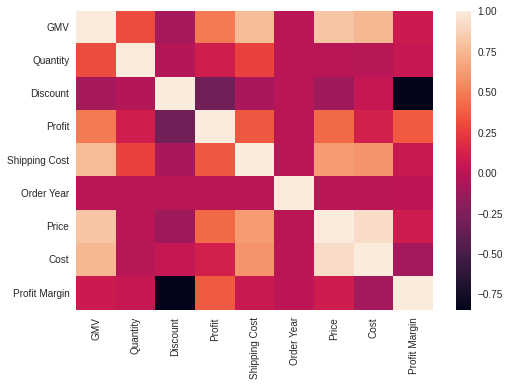

In [ ]:
import seaborn as sb
# plotting correlation heatmap
dataplot=sb.heatmap(raw_data.corr())

## Profit

### Total Profit per Categorial Data

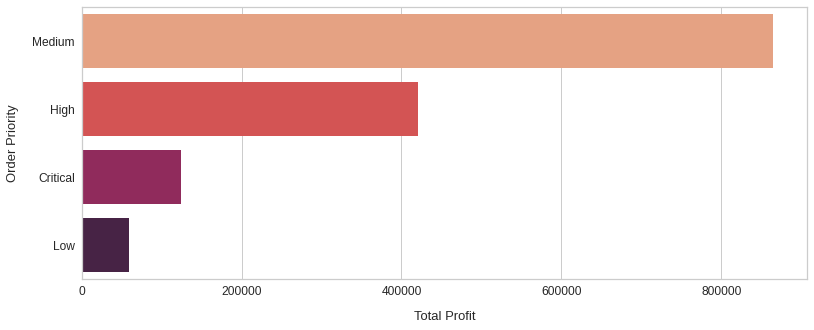

In [ ]:
#Check Total Profit per Order Priority

priority = raw_data.groupby('Order Priority')['Profit'].sum().sort_values(ascending=False)
priority_df = pd.DataFrame(list(priority.items()), columns=['Order Priority', 'Total Profit'])

plt.figure(figsize=(13,5))
sns.barplot(data = priority_df, x="Total Profit", y="Order Priority", palette='rocket_r');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Total Profit', fontsize=13, labelpad=13)
plt.ylabel('Order Priority', fontsize=13, labelpad=13);

In total, Medium priority order has largest contribute to profit

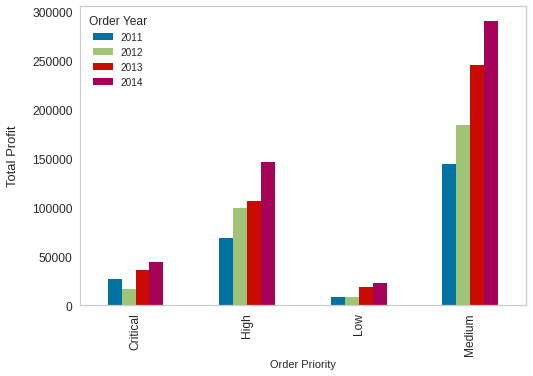

In [ ]:
#Check Total Profit per Order Priority per Year
priority = raw_data.groupby(['Order Priority','Order Year'])['Profit'].sum().sort_values(ascending=False)
priority.unstack().plot(kind='bar', stacked=False)
plt.grid()

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.ylabel('Total Profit', fontsize=13, labelpad=13);

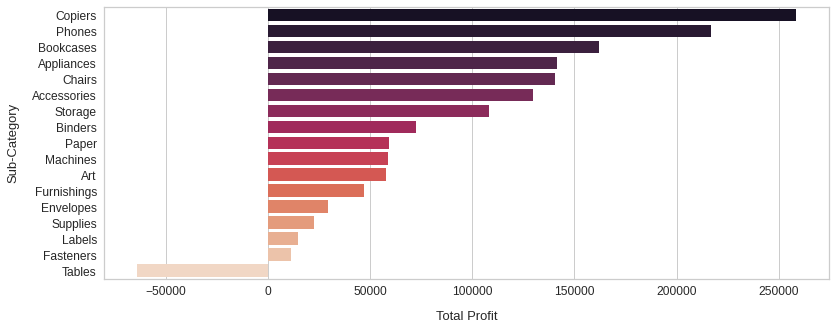

In [ ]:
#Check Total Profit per Sub-Category

priority = raw_data.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
priority_df = pd.DataFrame(list(priority.items()), columns=['Sub-Category', 'Total Profit'])

plt.figure(figsize=(13,5))
sns.barplot(data = priority_df, x="Total Profit", y="Sub-Category", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Total Profit', fontsize=13, labelpad=13)
plt.ylabel('Sub-Category', fontsize=13, labelpad=13);

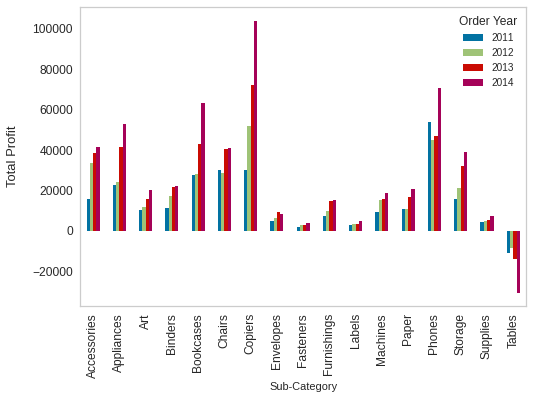

In [ ]:
#Check Total Profit per Sub-Category per Year
priority = raw_data.groupby(['Sub-Category','Order Year'])['Profit'].sum().sort_values(ascending=False)
priority.unstack().plot(kind='bar', stacked=False)
plt.grid()

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.ylabel('Total Profit', fontsize=13, labelpad=13);

We found that there is no profit in Tables sub-category. So, the company should not to resell Tables sub-category.

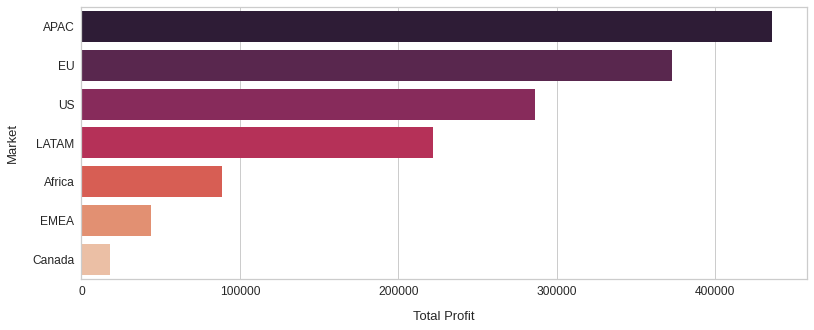

In [ ]:
#Check Total Profit per Market

priority = raw_data.groupby('Market')['Profit'].sum().sort_values(ascending=False)
priority_df = pd.DataFrame(list(priority.items()), columns=['Market', 'Total Profit'])

plt.figure(figsize=(13,5))
sns.barplot(data = priority_df, x="Total Profit", y="Market", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Total Profit', fontsize=13, labelpad=13)
plt.ylabel('Market', fontsize=13, labelpad=13);

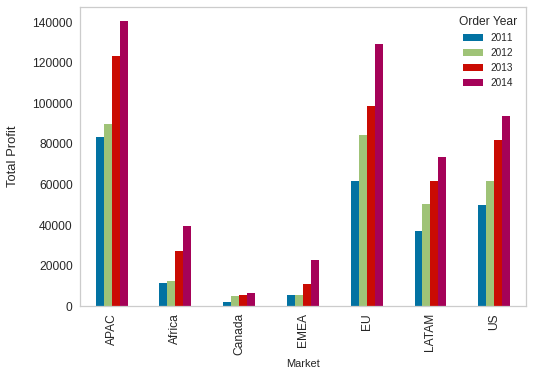

In [ ]:
#Check Total Profit per Market per Year
priority = raw_data.groupby(['Market','Order Year'])['Profit'].sum().sort_values(ascending=False)
priority.unstack().plot(kind='bar', stacked=False)
plt.grid()

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.ylabel('Total Profit', fontsize=13, labelpad=13);

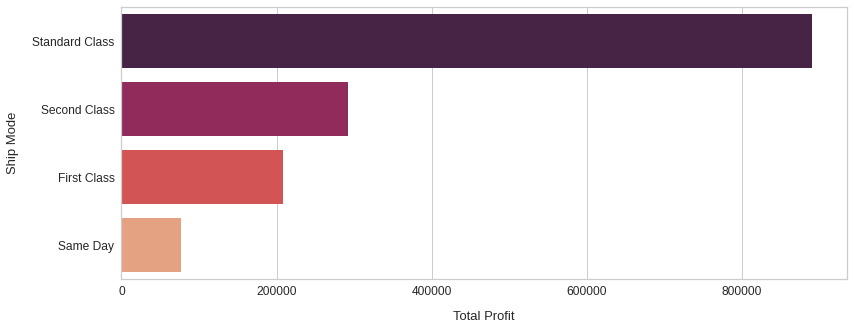

In [ ]:
#Check Total Profit per Ship Mode

priority = raw_data.groupby('Ship Mode')['Profit'].sum().sort_values(ascending=False)
priority_df = pd.DataFrame(list(priority.items()), columns=['Ship Mode', 'Total Profit'])

plt.figure(figsize=(13,5))
sns.barplot(data = priority_df, x="Total Profit", y="Ship Mode", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Total Profit', fontsize=13, labelpad=13)
plt.ylabel('Ship Mode', fontsize=13, labelpad=13);

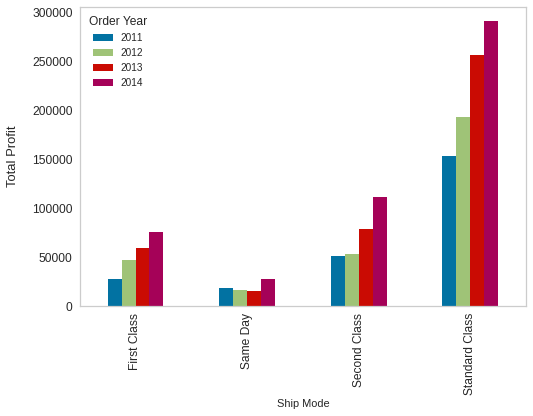

In [ ]:
#Check Total Profit per Ship Mode per Year
priority = raw_data.groupby(['Ship Mode','Order Year'])['Profit'].sum().sort_values(ascending=False)
priority.unstack().plot(kind='bar', stacked=False)
plt.grid()

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.ylabel('Total Profit', fontsize=13, labelpad=13);

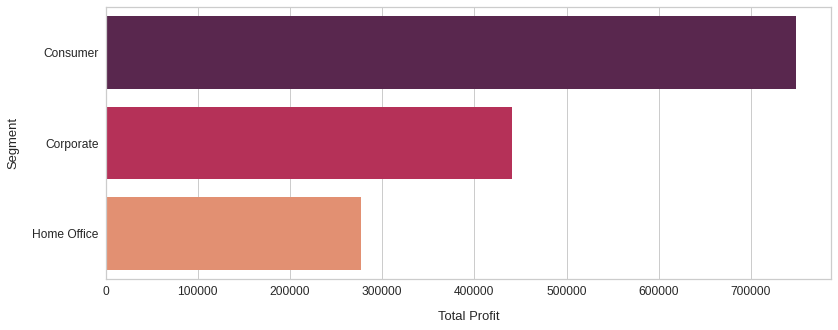

In [ ]:
#Check Total Profit per Segment

priority = raw_data.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
priority_df = pd.DataFrame(list(priority.items()), columns=['Segment', 'Total Profit'])

plt.figure(figsize=(13,5))
sns.barplot(data = priority_df, x="Total Profit", y="Segment", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Total Profit', fontsize=13, labelpad=13)
plt.ylabel('Segment', fontsize=13, labelpad=13);

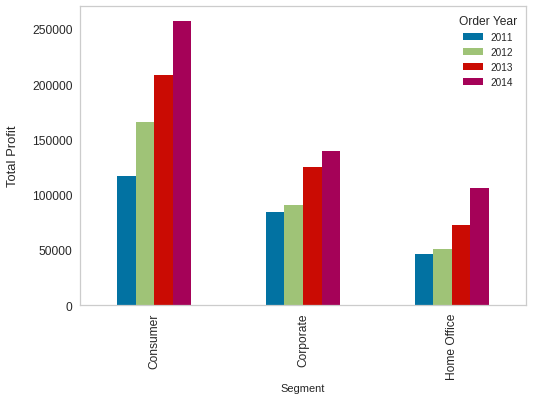

In [ ]:
#Check Total Profit per Segment per Year
priority = raw_data.groupby(['Segment','Order Year'])['Profit'].sum().sort_values(ascending=False)
priority.unstack().plot(kind='bar', stacked=False)
plt.grid()

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.ylabel('Total Profit', fontsize=13, labelpad=13);

### AVG Profit per Categorial Data

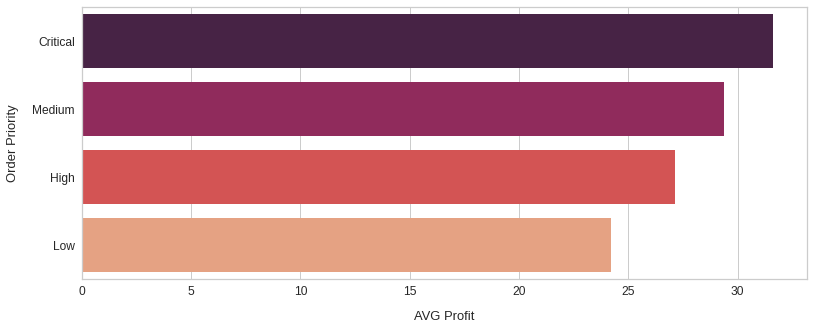

In [ ]:
#Check AVG Profit per Order Priority

priority = raw_data.groupby('Order Priority')['Profit'].mean().sort_values(ascending=False)
priority_df = pd.DataFrame(list(priority.items()), columns=['Order Priority', 'AVG Profit'])

plt.figure(figsize=(13,5))
sns.barplot(data = priority_df, x="AVG Profit", y="Order Priority", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('AVG Profit', fontsize=13, labelpad=13)
plt.ylabel('Order Priority', fontsize=13, labelpad=13);

We found that Critical order priority has a higher profit in average

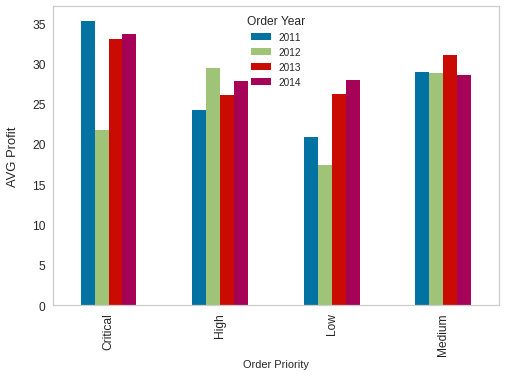

In [ ]:
#Check AVG Profit per Order Priority per Year
priority = raw_data.groupby(['Order Priority','Order Year'])['Profit'].mean().sort_values(ascending=False)
priority.unstack().plot(kind='bar', stacked=False)
plt.grid()

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.ylabel('AVG Profit', fontsize=13, labelpad=13);

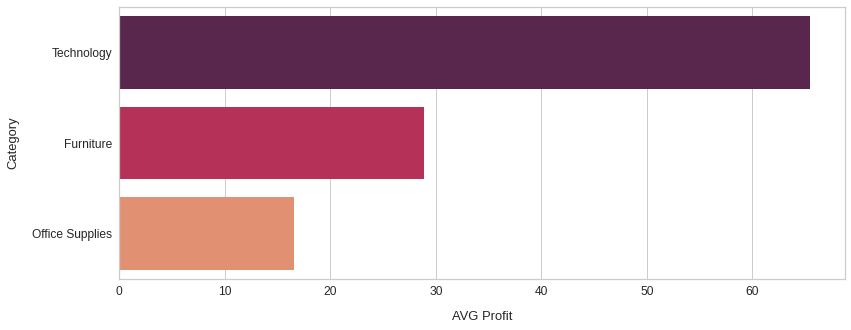

In [ ]:
#Check AVG Profit per Category

priority = raw_data.groupby('Category')['Profit'].mean().sort_values(ascending=False)
priority_df = pd.DataFrame(list(priority.items()), columns=['Category', 'AVG Profit'])

plt.figure(figsize=(13,5))
sns.barplot(data = priority_df, x="AVG Profit", y="Category", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('AVG Profit', fontsize=13, labelpad=13)
plt.ylabel('Category', fontsize=13, labelpad=13);

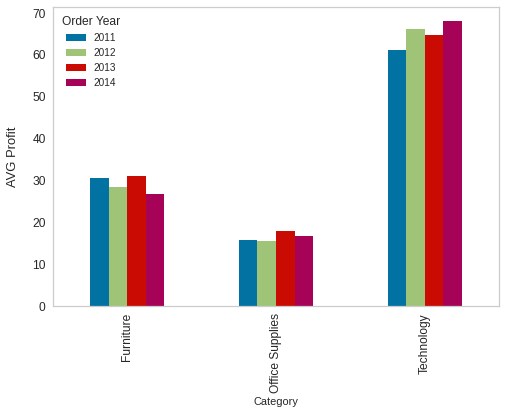

In [ ]:
#Check AVG Profit per Categoryper Year
priority = raw_data.groupby(['Category','Order Year'])['Profit'].mean().sort_values(ascending=False)
priority.unstack().plot(kind='bar', stacked=False)
plt.grid()

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.ylabel('AVG Profit', fontsize=13, labelpad=13);

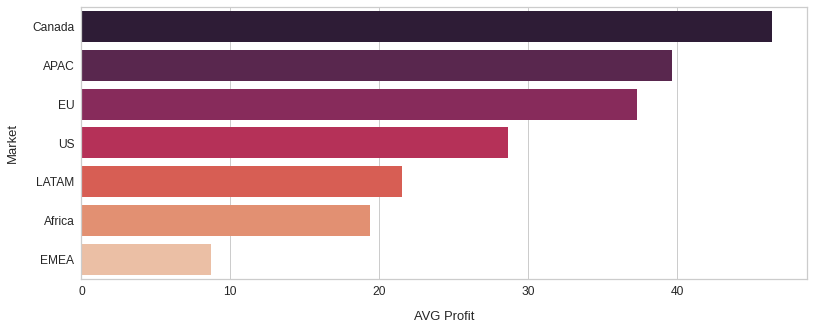

In [ ]:
#Check AVG Profit per Market

priority = raw_data.groupby('Market')['Profit'].mean().sort_values(ascending=False)
priority_df = pd.DataFrame(list(priority.items()), columns=['Market', 'AVG Profit'])

plt.figure(figsize=(13,5))
sns.barplot(data = priority_df, x="AVG Profit", y="Market", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('AVG Profit', fontsize=13, labelpad=13)
plt.ylabel('Market', fontsize=13, labelpad=13);

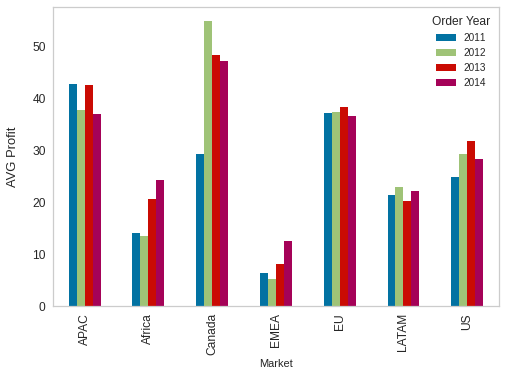

In [ ]:
#Check AVG Profit per Market per Year
priority = raw_data.groupby(['Market','Order Year'])['Profit'].mean().sort_values(ascending=False)
priority.unstack().plot(kind='bar', stacked=False)
plt.grid()

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.ylabel('AVG Profit', fontsize=13, labelpad=13);

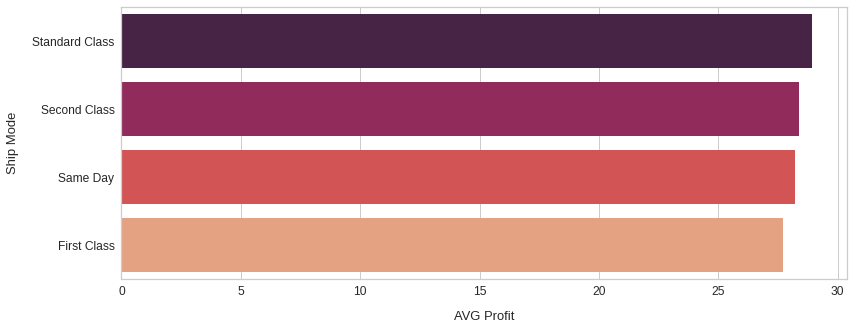

In [ ]:
#Check AVG Profit per Ship Mode

priority = raw_data.groupby('Ship Mode')['Profit'].mean().sort_values(ascending=False)
priority_df = pd.DataFrame(list(priority.items()), columns=['Ship Mode', 'AVG Profit'])

plt.figure(figsize=(13,5))
sns.barplot(data = priority_df, x="AVG Profit", y="Ship Mode", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('AVG Profit', fontsize=13, labelpad=13)
plt.ylabel('Ship Mode', fontsize=13, labelpad=13);

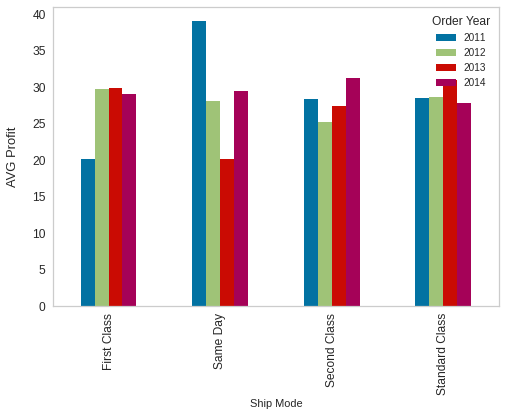

In [ ]:
#Check AVG Profit per Ship Mode per Year
priority = raw_data.groupby(['Ship Mode','Order Year'])['Profit'].mean().sort_values(ascending=False)
priority.unstack().plot(kind='bar', stacked=False)
plt.grid()

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.ylabel('AVG Profit', fontsize=13, labelpad=13);

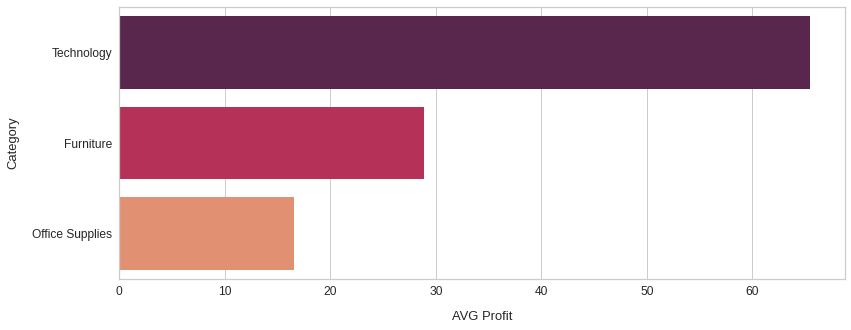

In [ ]:
#Check AVG Profit per Category

priority = raw_data.groupby('Category')['Profit'].mean().sort_values(ascending=False)
priority_df = pd.DataFrame(list(priority.items()), columns=['Category', 'AVG Profit'])

plt.figure(figsize=(13,5))
sns.barplot(data = priority_df, x="AVG Profit", y="Category", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('AVG Profit', fontsize=13, labelpad=13)
plt.ylabel('Category', fontsize=13, labelpad=13);

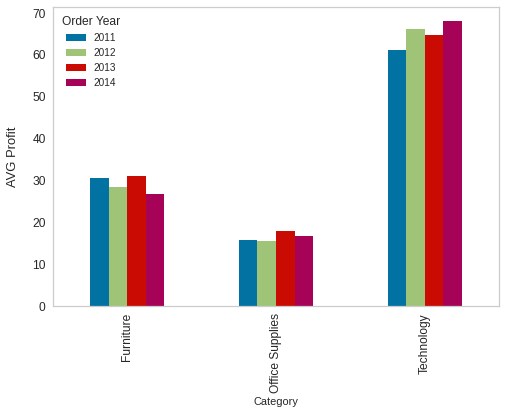

In [ ]:
#Check AVG Profit per Category per Year
priority = raw_data.groupby(['Category','Order Year'])['Profit'].mean().sort_values(ascending=False)
priority.unstack().plot(kind='bar', stacked=False)
plt.grid()

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.ylabel('AVG Profit', fontsize=13, labelpad=13);

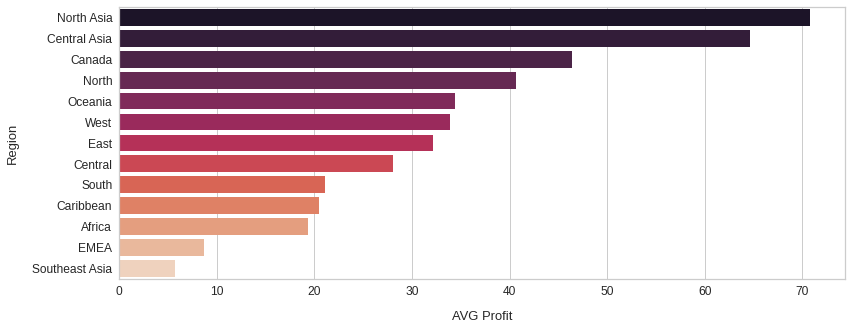

In [ ]:
#Check Total Profit per Region

priority = raw_data.groupby('Region')['Profit'].mean().sort_values(ascending=False)
priority_df = pd.DataFrame(list(priority.items()), columns=['Region', 'AVG Profit'])

plt.figure(figsize=(13,5))
sns.barplot(data = priority_df, x="AVG Profit", y="Region", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('AVG Profit', fontsize=13, labelpad=13)
plt.ylabel('Region', fontsize=13, labelpad=13);

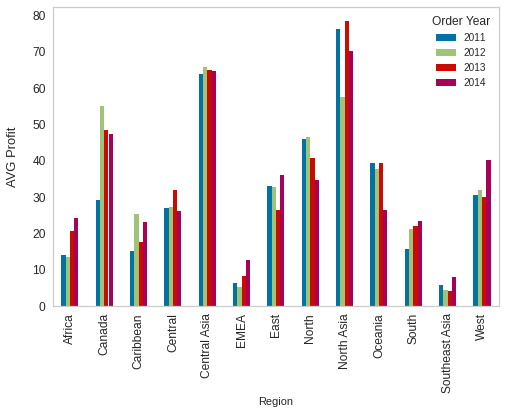

In [ ]:
#Check AVG Profit per Region per Year
priority = raw_data.groupby(['Region','Order Year'])['Profit'].mean().sort_values(ascending=False)
priority.unstack().plot(kind='bar', stacked=False)
plt.grid()

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.ylabel('AVG Profit', fontsize=13, labelpad=13);

##Profit Margin

### AVG Profit Margin per Categorial Data

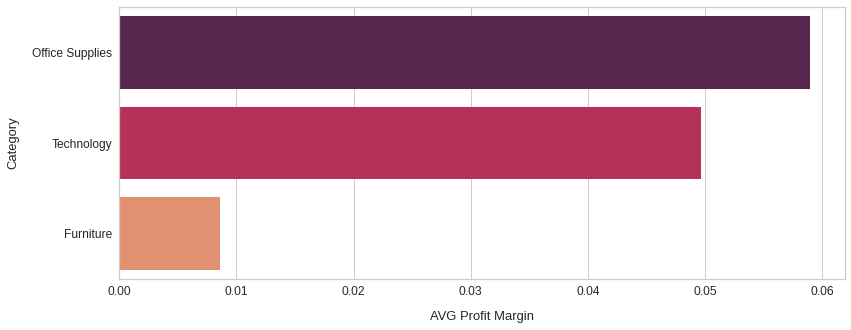

In [ ]:
#Check AVG Profit Margin per Category

priority = raw_data.groupby('Category')['Profit Margin'].mean().sort_values(ascending=False)
priority_df = pd.DataFrame(list(priority.items()), columns=['Category', 'AVG Profit Margin'])

plt.figure(figsize=(13,5))
sns.barplot(data = priority_df, x="AVG Profit Margin", y="Category", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('AVG Profit Margin', fontsize=13, labelpad=13)
plt.ylabel('Category', fontsize=13, labelpad=13);

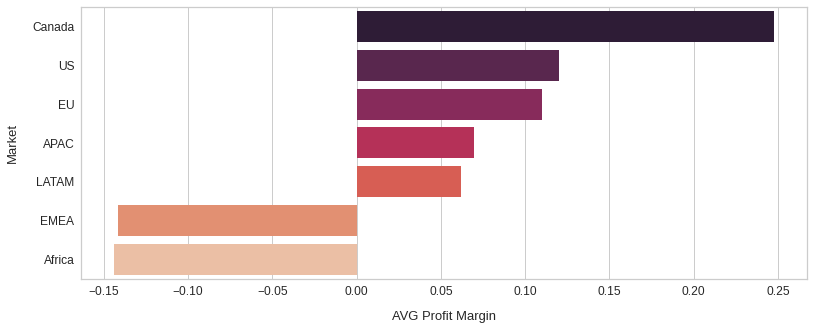

In [ ]:
#Check AVG Profit Margin per Market

priority = raw_data.groupby('Market')['Profit Margin'].mean().sort_values(ascending=False)
priority_df = pd.DataFrame(list(priority.items()), columns=['Market', 'AVG Profit Margin'])

plt.figure(figsize=(13,5))
sns.barplot(data = priority_df, x="AVG Profit Margin", y="Market", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('AVG Profit Margin', fontsize=13, labelpad=13)
plt.ylabel('Market', fontsize=13, labelpad=13);

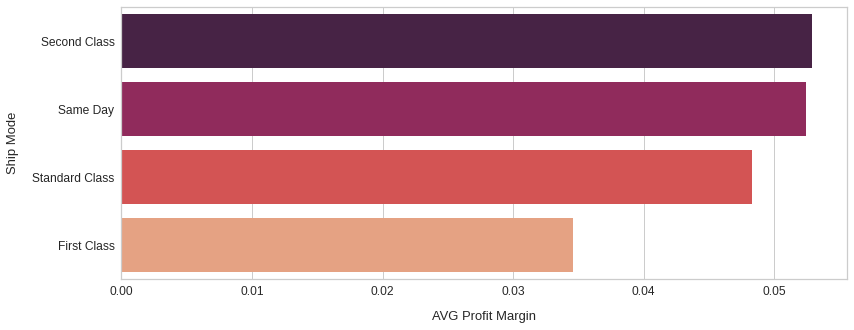

In [ ]:
#Check AVG Profit Margin per Ship Mode

priority = raw_data.groupby('Ship Mode')['Profit Margin'].mean().sort_values(ascending=False)
priority_df = pd.DataFrame(list(priority.items()), columns=['Ship Mode', 'AVG Profit Margin'])

plt.figure(figsize=(13,5))
sns.barplot(data = priority_df, x="AVG Profit Margin", y="Ship Mode", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('AVG Profit Margin', fontsize=13, labelpad=13)
plt.ylabel('Ship Mode', fontsize=13, labelpad=13);

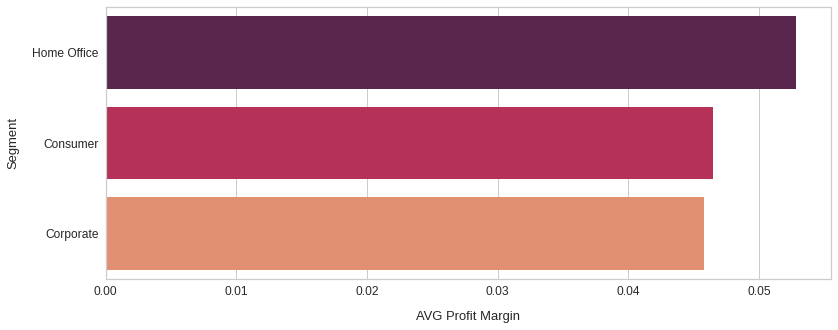

In [ ]:
#Check AVG Profit Margin per Segment

priority = raw_data.groupby('Segment')['Profit Margin'].mean().sort_values(ascending=False)
priority_df = pd.DataFrame(list(priority.items()), columns=['Segment', 'AVG Profit Margin'])

plt.figure(figsize=(13,5))
sns.barplot(data = priority_df, x="AVG Profit Margin", y="Segment", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('AVG Profit Margin', fontsize=13, labelpad=13)
plt.ylabel('Segment', fontsize=13, labelpad=13);

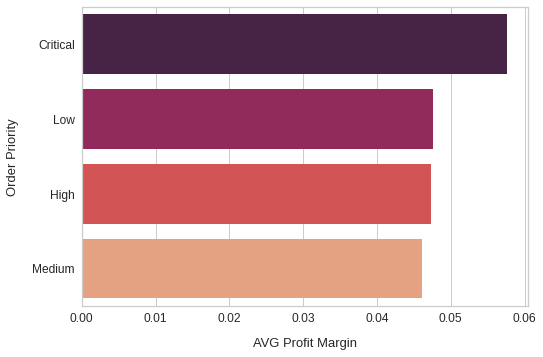

In [ ]:
#Check AVG Profit Margin per Order Priority

priority = raw_data.groupby('Order Priority')['Profit Margin'].mean().sort_values(ascending=False)
priority_df = pd.DataFrame(list(priority.items()), columns=['Order Priority', 'AVG Profit Margin'])

sns.barplot(data = priority_df, x="AVG Profit Margin", y="Order Priority", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('AVG Profit Margin', fontsize=13, labelpad=13)
plt.ylabel('Order Priority', fontsize=13, labelpad=13);

## Order Priority

### Order Priority per Categorial Data

Text(0, 0.5, 'Category (Value Counts)')

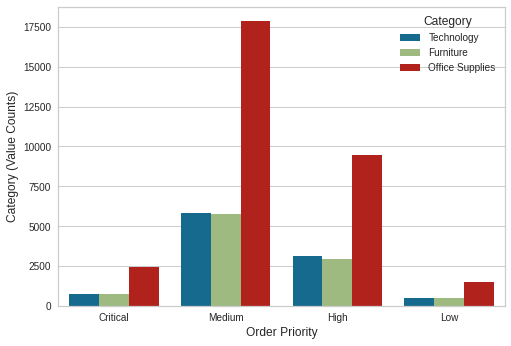

In [ ]:
ax = sns.countplot(x='Order Priority', hue='Category', data=raw_data);

plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Order Priority", fontsize=12)
plt.ylabel("Category (Value Counts)", fontsize=12)

Text(0, 0.5, 'Segment (Value Counts)')

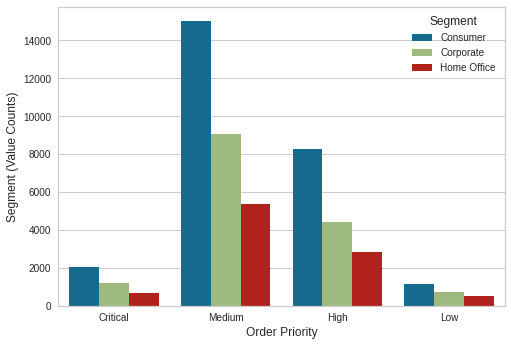

In [ ]:
ax = sns.countplot(x='Order Priority', hue='Segment', data=raw_data);

plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Order Priority", fontsize=12)
plt.ylabel("Segment (Value Counts)", fontsize=12)

Text(0, 0.5, 'Ship Mode (Value Counts)')

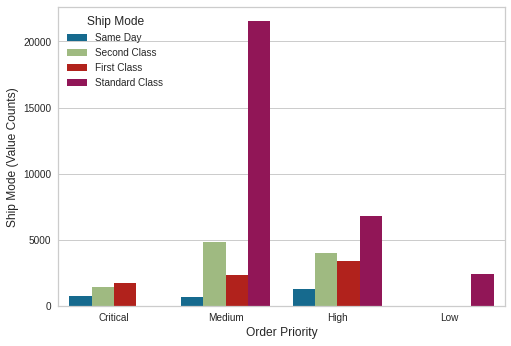

In [ ]:
ax = sns.countplot(x='Order Priority', hue='Ship Mode', data=raw_data);

plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Order Priority", fontsize=12)
plt.ylabel("Ship Mode (Value Counts)", fontsize=12)

In this bar, we found that High priority order based on First Class shipping mode

Text(0, 0.5, 'Market (Value Counts)')

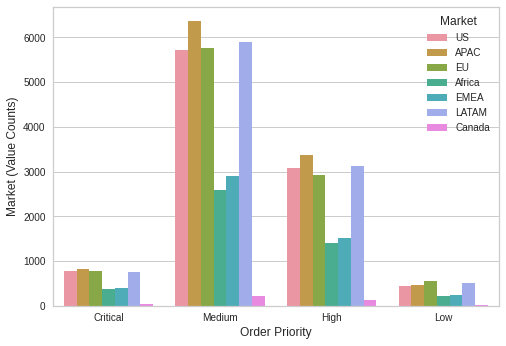

In [ ]:
ax = sns.countplot(x='Order Priority', hue='Market', data=raw_data);

plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Order Priority", fontsize=12)
plt.ylabel("Market (Value Counts)", fontsize=12)

Text(0, 0.5, 'Region (Value Counts)')

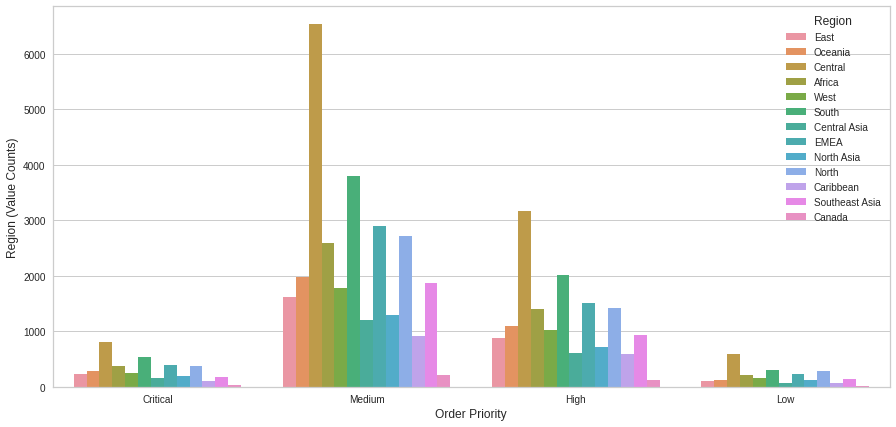

In [ ]:
plt.figure(figsize=[15,7])
ax = sns.countplot(x='Order Priority', hue='Region', data=raw_data);

plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Order Priority", fontsize=12)
plt.ylabel("Region (Value Counts)", fontsize=12)

Text(0, 0.5, 'Sub-Category (Value Counts)')

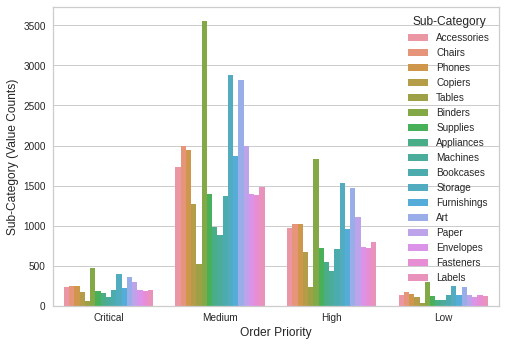

In [ ]:
ax = sns.countplot(x='Order Priority', hue='Sub-Category', data=raw_data);

plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Order Priority", fontsize=12)
plt.ylabel("Sub-Category (Value Counts)", fontsize=12)

### Order Priority per Numerical Data
in average, either by year or total lifetime

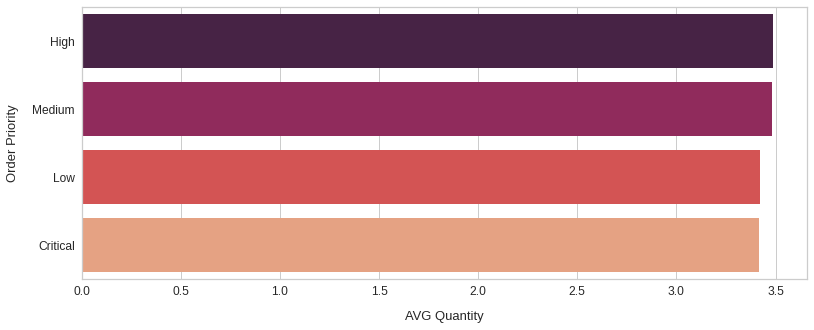

In [ ]:
#Check AVG Quantity per Order Priority

priority = raw_data.groupby('Order Priority')['Quantity'].mean().sort_values(ascending=False)
priority_df = pd.DataFrame(list(priority.items()), columns=['Order Priority', 'AVG Quantity'])

plt.figure(figsize=(13,5))
sns.barplot(data = priority_df, x="AVG Quantity", y="Order Priority", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('AVG Quantity', fontsize=13, labelpad=13)
plt.ylabel('Order Priority', fontsize=13, labelpad=13);

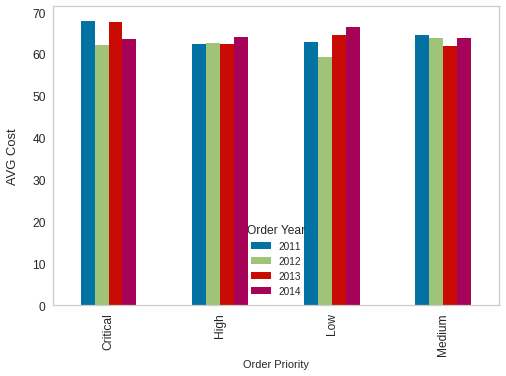

In [ ]:
#Check AVG Quantity per Order Priority per Year

priority = raw_data.groupby(['Order Priority','Order Year'])['Cost'].mean().sort_values(ascending=False)
priority.unstack().plot(kind='bar', stacked=False)
plt.grid()

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.ylabel('AVG Cost', fontsize=13, labelpad=13);

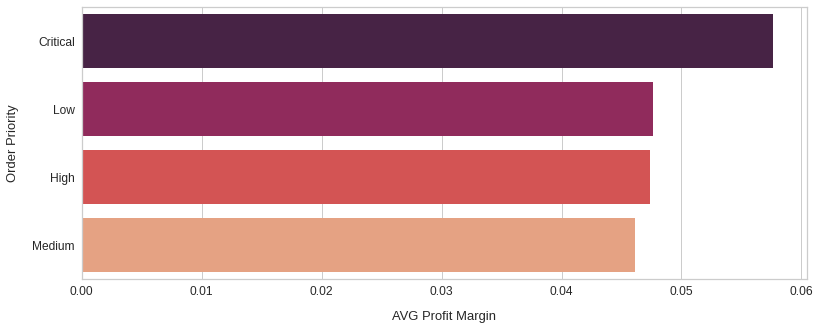

In [ ]:
#Check AVG Profit Margin per Order Priority
priority = raw_data.groupby('Order Priority')['Profit Margin'].mean().sort_values(ascending=False)
priority_df = pd.DataFrame(list(priority.items()), columns=['Order Priority', 'Total GMV'])

plt.figure(figsize=(13,5))
sns.barplot(data = priority_df, x="Total GMV", y="Order Priority", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('AVG Profit Margin', fontsize=13, labelpad=13)
plt.ylabel('Order Priority', fontsize=13, labelpad=13);

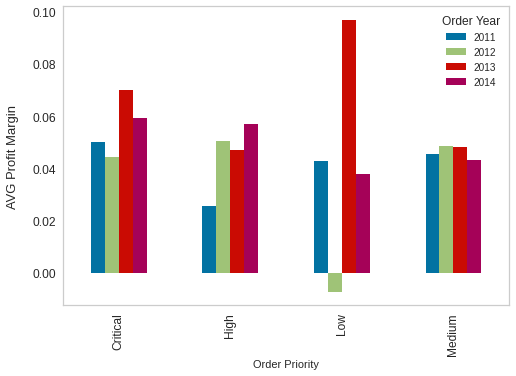

In [ ]:
#Check AVG Profit Margin per Order Priority per Year
priority = raw_data.groupby(['Order Priority','Order Year'])['Profit Margin'].mean().sort_values(ascending=False)
priority.unstack().plot(kind='bar', stacked=False)
plt.grid()

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.ylabel('AVG Profit Margin', fontsize=13, labelpad=13);

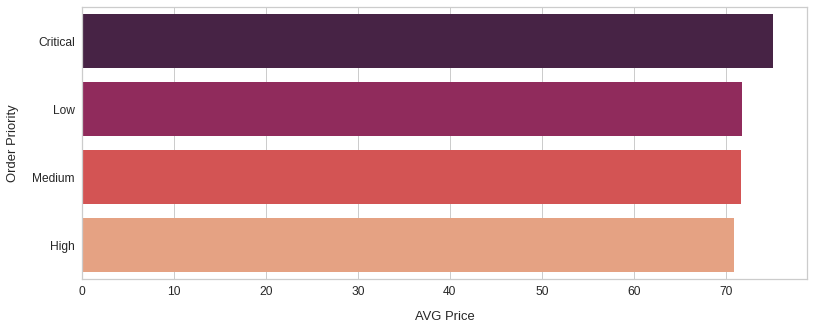

In [ ]:
#Check AVG Price per Order Priority

priority = raw_data.groupby('Order Priority')['Price'].mean().sort_values(ascending=False)
priority_df = pd.DataFrame(list(priority.items()), columns=['Order Priority', 'AVG Price'])

plt.figure(figsize=(13,5))
sns.barplot(data = priority_df, x="AVG Price", y="Order Priority", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('AVG Price', fontsize=13, labelpad=13)
plt.ylabel('Order Priority', fontsize=13, labelpad=13);

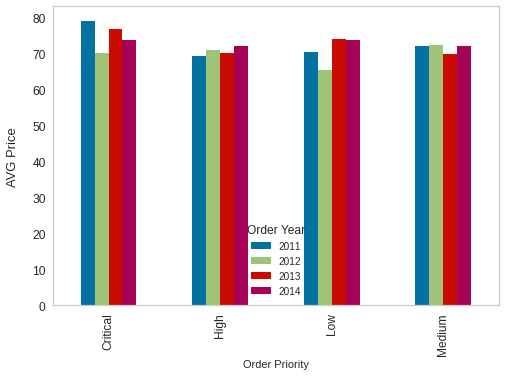

In [ ]:
#Check AVG Price per Order Priority per Year
priority = raw_data.groupby(['Order Priority','Order Year'])['Price'].mean().sort_values(ascending=False)
priority.unstack().plot(kind='bar', stacked=False)
plt.grid()

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.ylabel('AVG Price', fontsize=13, labelpad=13);

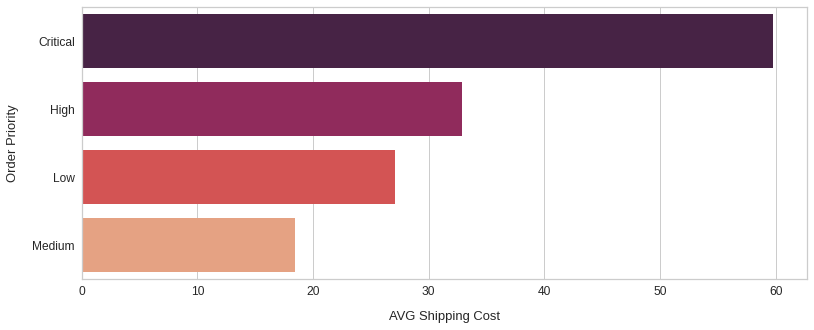

In [ ]:
#Check AVG Shipping Cost per Order Priority

priority = raw_data.groupby('Order Priority')['Shipping Cost'].mean().sort_values(ascending=False)
priority_df = pd.DataFrame(list(priority.items()), columns=['Order Priority', 'AVG Shipping Cost'])

plt.figure(figsize=(13,5))
sns.barplot(data = priority_df, x="AVG Shipping Cost", y="Order Priority", palette='rocket');

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('AVG Shipping Cost', fontsize=13, labelpad=13)
plt.ylabel('Order Priority', fontsize=13, labelpad=13);

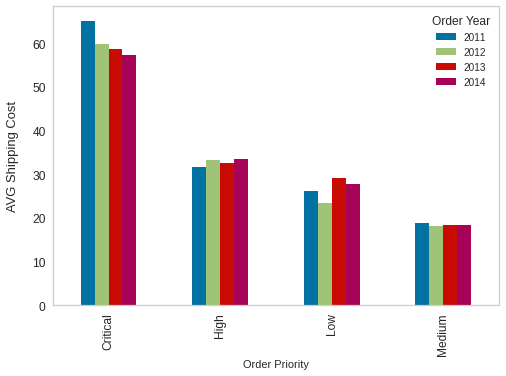

In [ ]:
#Check AVG Shipping Cost per Order Priority per Year
priority = raw_data.groupby(['Order Priority','Order Year'])['Shipping Cost'].mean().sort_values(ascending=False)
priority.unstack().plot(kind='bar', stacked=False)
plt.grid()

plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.ylabel('AVG Shipping Cost', fontsize=13, labelpad=13);

# RFM Segmentation

To advice this learning:
1. Watch tutorial video [Klik](https://www.youtube.com/watch?v=iiLJzLRsZ4A)
2. Read the module [Klik](https://docs.google.com/presentation/d/15mJ8f6WAwihvV-rv9dk73E5oM0acL8V9Z3p4-bOBESY/edit#slide=id.g11331d96bc9_0_0)

## Create data object for RFM Model

In [ ]:
data_for_model = raw_data.groupby(['Customer ID'], as_index=False).agg({
        'Order Date': lambda x: (analysis_date - x.max()).days,
        'Order ID':'count',
        'Profit': 'sum'})

In [ ]:
data_for_model.rename(columns={'Order Date': 'Recency',
                         'Order ID': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

In [ ]:
data_for_model = data_for_model[data_for_model['Profit'] > 0]

In [ ]:
data_for_model

,Customer ID,Recency,Frequency,Profit
0,AA-10315,8,42,447.69050
1,AA-10375,6,42,677.47740
2,AA-10480,117,38,1516.47518
3,AA-10645,26,73,3051.43900
4,AA-315,2,8,535.56600
...,...,...,...,...
1583,YC-21895,4,51,4324.90760
1584,YS-11880,4,8,358.81200
1585,YS-21880,9,54,3091.59430
1587,ZC-21910,3,84,452.50326


Create RFM segmentation by using `rfm_table_order` function

In [ ]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_groups = pd.qcut(data_for_model['Recency'], q=4, labels = r_labels)
f_groups = pd.qcut(data_for_model['Frequency'], q=4, labels = f_labels)
m_groups = pd.qcut(data_for_model['Profit'], q=4, labels = m_labels)

In [ ]:
data_for_model = data_for_model.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)

In [ ]:
data_for_model['rfm_score'] = data_for_model[['R','F','M']].apply(
    lambda x: ''.join(x.astype(str)),
    axis=1
)

In [ ]:
data_for_model['rfm_score'] = data_for_model['rfm_score'].astype('int')

Check final result

In [ ]:
data_for_model

,Customer ID,Recency,Frequency,Profit,R,F,M,rfm_score
0,AA-10315,8,42,447.69050,4,3,2,432
1,AA-10375,6,42,677.47740,4,3,2,432
2,AA-10480,117,38,1516.47518,1,3,3,133
3,AA-10645,26,73,3051.43900,3,4,4,344
4,AA-315,2,8,535.56600,4,1,2,412
...,...,...,...,...,...,...,...,...
1583,YC-21895,4,51,4324.90760,4,3,4,434
1584,YS-11880,4,8,358.81200,4,1,2,412
1585,YS-21880,9,54,3091.59430,4,3,4,434
1587,ZC-21910,3,84,452.50326,4,4,2,442


## Post-Segmentation Analysis

**Heatmap Visualization**

**RFM Distribution**

In [ ]:
rfm_bar_data = data_for_model[["R", "F", "M"]].groupby(["R","F","M"], as_index = False).size()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


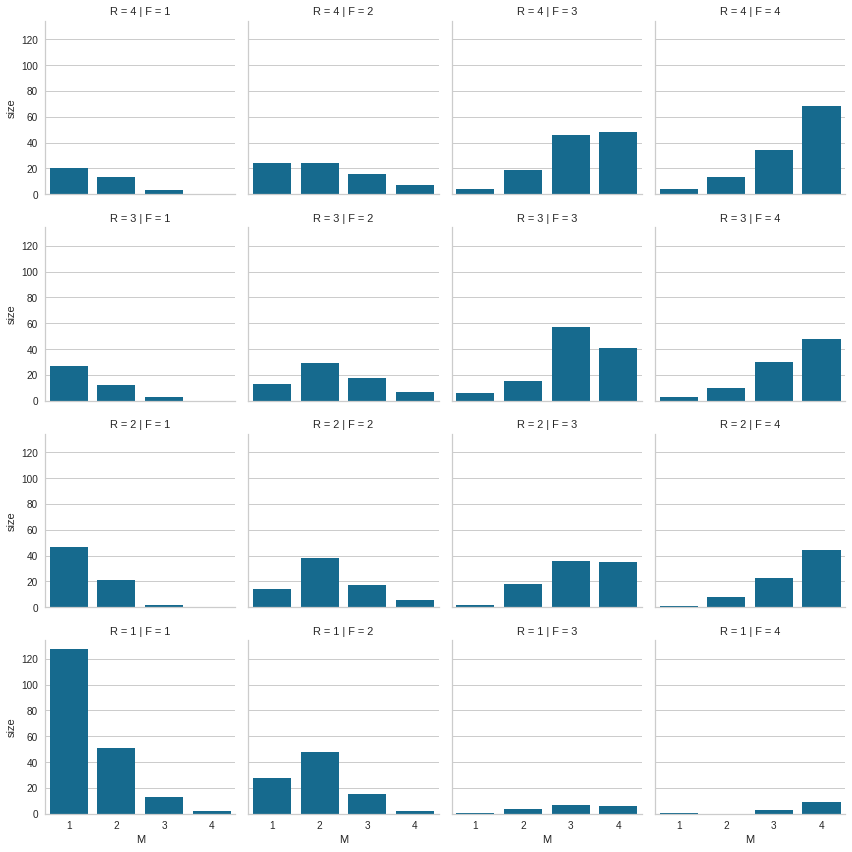

In [ ]:
g = sns.FacetGrid(
    data = rfm_bar_data,
    col = "F",
    row = "R"
)
g.map(sns.barplot, "M", "size");

**Recency, Frequency, and Profit Distribution**

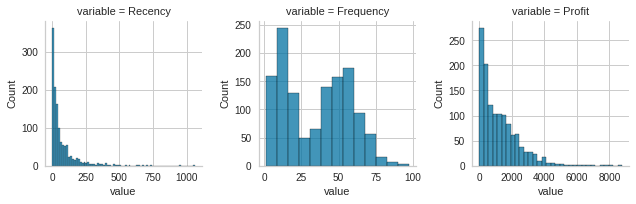

In [ ]:
g = sns.FacetGrid(
    data = pd.melt(
     data_for_model[["Recency", "Frequency","Profit"]],
     value_vars=["Recency","Frequency", "Profit"]
    ),
    col = "variable",
    sharex = False,
    sharey = False
)
g.map(sns.histplot, "value");

**RFM Score to RFM Segment**

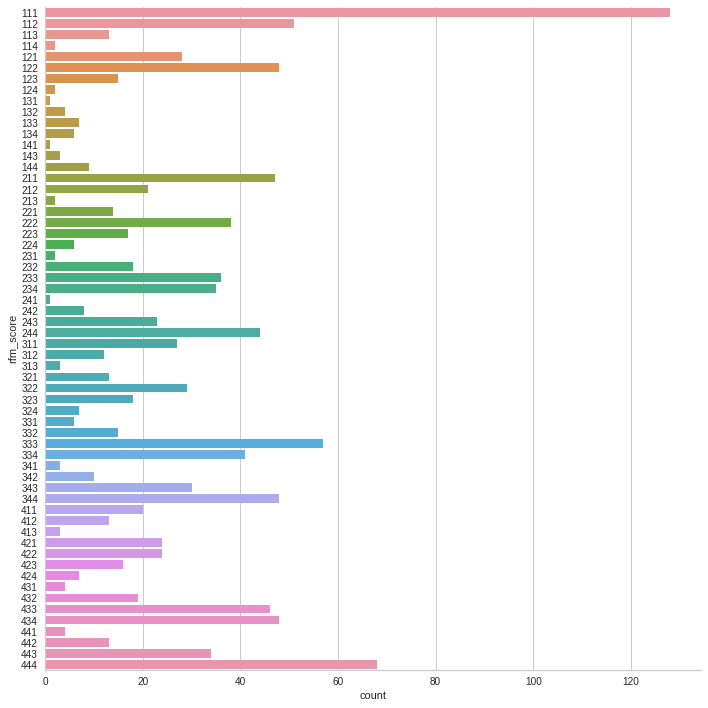

In [ ]:
sns.catplot(
    y = "rfm_score", 
    data = data_for_model.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
)

## Segmenting base on RFM Score


In [ ]:
data_for_model['rfm_segment'] = np.select(
    [
     data_for_model['rfm_score'].isin([444]),
     data_for_model['rfm_score'].isin([333, 334, 343, 344, 433, 434, 443]),
     data_for_model['rfm_score'].isin([321, 322, 323, 324, 331, 332, 341, 342, 412, 413, 414, 421, 422, 423, 424, 431, 432, 441, 442]),
     data_for_model['rfm_score'].isin([411]),
     data_for_model['rfm_score'].isin([221, 222, 223, 224, 231, 232, 241, 242, 311, 312, 313, 314]),
     data_for_model['rfm_score'].isin([133, 134, 143, 144, 233, 234, 243, 244]),
     data_for_model['rfm_score'].isin([112, 113, 114, 121, 122, 123, 124, 131, 132, 141, 142, 211, 212, 213, 214, 111]),
     data_for_model['rfm_score'].isin([111])
    ],
    [
     'Champion',
     'Loyal Customer',
     'Promising',
     'Recent Customers',
     'Customer Needing Attention',
     "Can't Lose Them",
     "At Risk",
     "Lost"
    ]
)

In [ ]:
data_for_model

,Customer ID,Recency,Frequency,Profit,R,F,M,rfm_score,rfm_segment
0,AA-10315,8,42,447.69050,4,3,2,432,Promising
1,AA-10375,6,42,677.47740,4,3,2,432,Promising
2,AA-10480,117,38,1516.47518,1,3,3,133,Can't Lose Them
3,AA-10645,26,73,3051.43900,3,4,4,344,Loyal Customer
4,AA-315,2,8,535.56600,4,1,2,412,Promising
...,...,...,...,...,...,...,...,...,...
1583,YC-21895,4,51,4324.90760,4,3,4,434,Loyal Customer
1584,YS-11880,4,8,358.81200,4,1,2,412,Promising
1585,YS-21880,9,54,3091.59430,4,3,4,434,Loyal Customer
1587,ZC-21910,3,84,452.50326,4,4,2,442,Promising


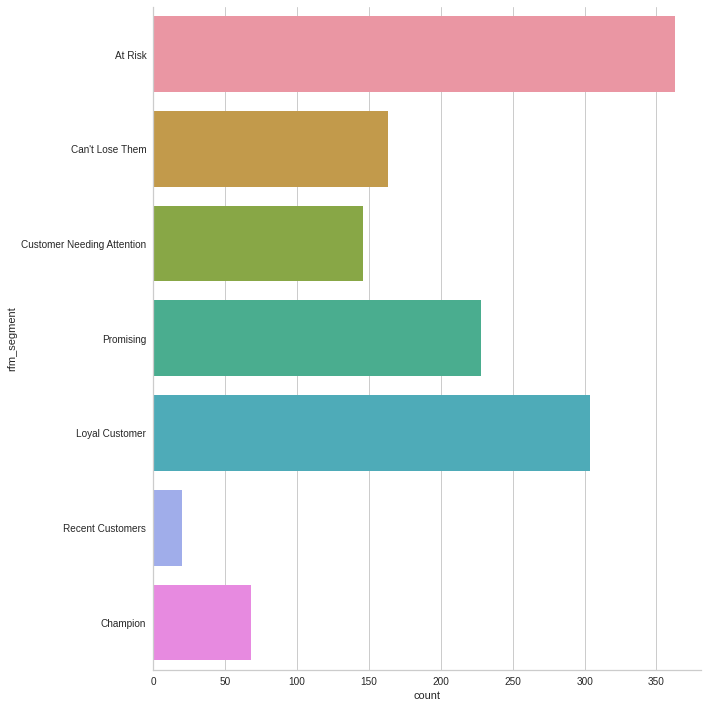

In [ ]:
sns.catplot(
    y = "rfm_segment", 
    data = data_for_model.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
);

# K-Means Clustering

K-Means use to optimilized number of cluster, simple, and efficient

In [ ]:
data_for_model

,Customer ID,Recency,Frequency,Profit,R,F,M,rfm_score,rfm_segment
0,AA-10315,8,42,447.69050,4,3,2,432,Promising
1,AA-10375,6,42,677.47740,4,3,2,432,Promising
2,AA-10480,117,38,1516.47518,1,3,3,133,Can't Lose Them
3,AA-10645,26,73,3051.43900,3,4,4,344,Loyal Customer
4,AA-315,2,8,535.56600,4,1,2,412,Promising
...,...,...,...,...,...,...,...,...,...
1583,YC-21895,4,51,4324.90760,4,3,4,434,Loyal Customer
1584,YS-11880,4,8,358.81200,4,1,2,412,Promising
1585,YS-21880,9,54,3091.59430,4,3,4,434,Loyal Customer
1587,ZC-21910,3,84,452.50326,4,4,2,442,Promising


Data standarization using StandardScaler

In [ ]:
scaler_obj = StandardScaler()
scaled_data = scaler_obj.fit_transform(data_for_model[["Recency", "Frequency", "Profit"]].to_numpy())
data_for_kmeans = pd.DataFrame(scaled_data, columns = ["Recency", "Frequency", "Profit"])

Check standardize data

In [ ]:
data_for_kmeans

,Recency,Frequency,Profit
0,-0.615191,0.321715,-0.673577
1,-0.633559,0.321715,-0.482429
2,0.385839,0.139510,0.215491
3,-0.449884,1.733809,1.492350
4,-0.670294,-1.227032,-0.600478
...,...,...,...
1287,-0.651926,0.731678,2.551684
1288,-0.651926,-1.227032,-0.747510
1289,-0.606007,0.868332,1.525753
1290,-0.661110,2.234874,-0.669573


## K-Means Modeling

Create clusters using k-means by setting k = 4

In [ ]:
kmeans_model = KMeans(
    n_clusters = 4,
    random_state=1000
)

kmeans_model.fit(data_for_kmeans)

KMeans(n_clusters=4, random_state=1000)

Check frequencies of each cluster

In [ ]:
np.unique(kmeans_model.labels_, return_counts = True)

(array([0, 1, 2, 3], dtype=int32), array([176, 491,  97, 528]))

Assign cluster to "cluster" column

In [ ]:
data_for_model["cluster"] = kmeans_model.labels_

## Post-Modeling Analysis

Check data after cluster assignment

In [ ]:
data_for_model

,Customer ID,Recency,Frequency,Profit,R,F,M,rfm_score,rfm_segment,cluster
0,AA-10315,8,42,447.69050,4,3,2,432,Promising,3
1,AA-10375,6,42,677.47740,4,3,2,432,Promising,3
2,AA-10480,117,38,1516.47518,1,3,3,133,Can't Lose Them,3
3,AA-10645,26,73,3051.43900,3,4,4,344,Loyal Customer,0
4,AA-315,2,8,535.56600,4,1,2,412,Promising,1
...,...,...,...,...,...,...,...,...,...,...
1583,YC-21895,4,51,4324.90760,4,3,4,434,Loyal Customer,0
1584,YS-11880,4,8,358.81200,4,1,2,412,Promising,1
1585,YS-21880,9,54,3091.59430,4,3,4,434,Loyal Customer,0
1587,ZC-21910,3,84,452.50326,4,4,2,442,Promising,3


Total users per segment

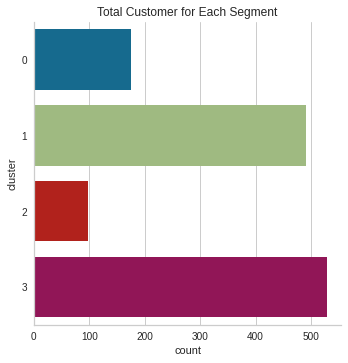

In [ ]:
sns.catplot(
    y = "cluster", 
    data = data_for_model, 
    kind = "count", 
    height = 5
).ax.set_title("Total Customer for Each Segment");

**Recency Days Distribution of Each Segment**

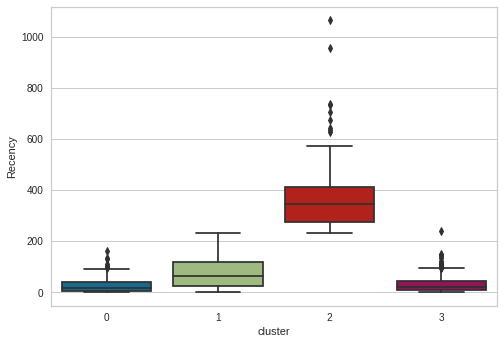

In [ ]:
sns.boxplot(x = 'cluster', y = 'Recency', data = data_for_model)

**Transaction Frequency Distribution of Each Segment**

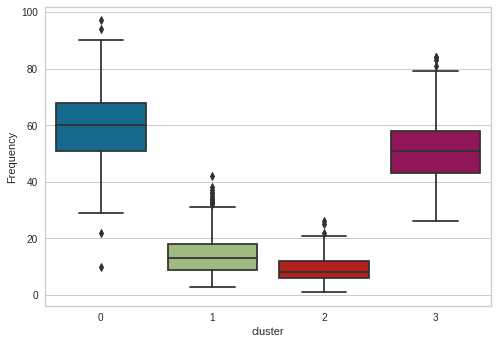

In [ ]:
sns.boxplot(x = 'cluster', y = 'Frequency', data = data_for_model)

**Profit Distribution of Each Segment**

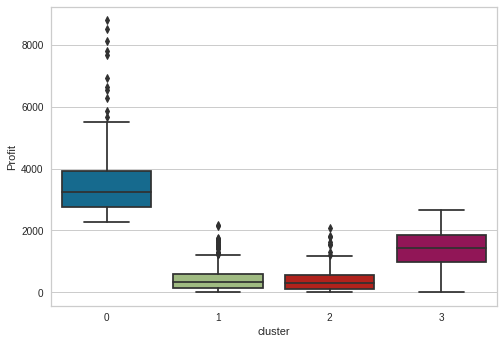

In [ ]:
sns.boxplot(x = 'cluster', y = 'Profit', data = data_for_model)

## Cluster Evaluation

**Elbow Method**

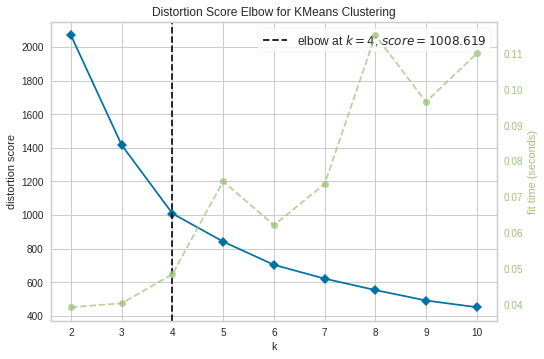

In [ ]:
model = KElbowVisualizer(KMeans(random_state=1000), k=10)
model.fit(data_for_kmeans)
model.show()

**Silhouette Method**

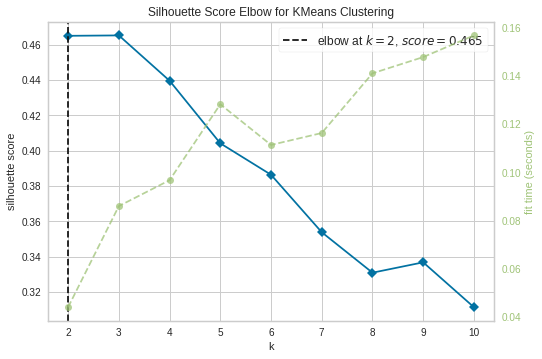

In [ ]:
model = KElbowVisualizer(KMeans(random_state=1000), k=10, metric = "silhouette")
model.fit(data_for_kmeans)
model.show()

**Silhouette Visualization**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


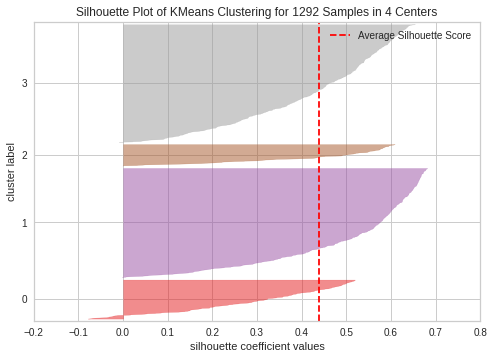

In [ ]:
visualizer = SilhouetteVisualizer(kmeans_model, is_fitted = True)
visualizer.fit(data_for_kmeans)
visualizer.show();

## Cluster Visualization

Dimensionality reduction using principal component analysis

In [ ]:
data_for_kmeans

,Recency,Frequency,Profit
0,-0.615191,0.321715,-0.673577
1,-0.633559,0.321715,-0.482429
2,0.385839,0.139510,0.215491
3,-0.449884,1.733809,1.492350
4,-0.670294,-1.227032,-0.600478
...,...,...,...
1287,-0.651926,0.731678,2.551684
1288,-0.651926,-1.227032,-0.747510
1289,-0.606007,0.868332,1.525753
1290,-0.661110,2.234874,-0.669573


In [ ]:
pca_model = PCA()
pca_model.fit(data_for_kmeans)
pca_result = pca_model.transform(data_for_kmeans)

Check PCA result

In [ ]:
pca_model.explained_variance_ratio_

array([0.65141566, 0.24250086, 0.10608348])

In [ ]:
pca_result

array([[-0.10925351, -0.81205725, -0.51409503],
       [-0.23129813, -0.72855618, -0.3915893 ],
       [-0.02758976,  0.45849078, -0.06161214],
       ...,
       [-1.75534032,  0.42400597,  0.4337831 ],
       [-1.35902307, -0.53299436, -1.93624101],
       [ 0.55305566, -1.01769631,  0.33265169]])

Visualize cluster

In [ ]:
pca_result = pd.DataFrame(pca_result, columns = ["PC1", "PC2", "PC3"])
pca_result['cluster'] = kmeans_model.labels_

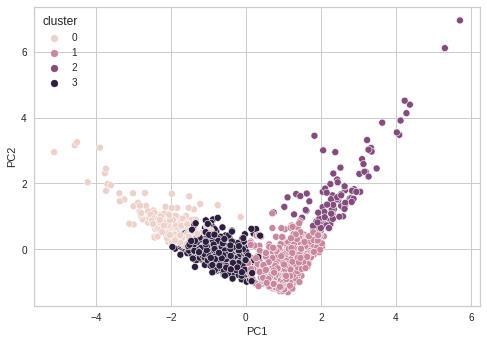

In [ ]:
sns.scatterplot(data = pca_result, x = "PC1", y = "PC2", hue = "cluster");

Visualization by using convex hull

In [ ]:
centroids = kmeans_model.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
colors = ['#DF2020', '#81DF20', '#2095DF']
pca_result['c'] = pca_result.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

## Biplot

In [ ]:
def myplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

In [ ]:
pca_model = PCA()
pca_model.fit(data_for_kmeans)
pca_result = pca_model.transform(data_for_kmeans)

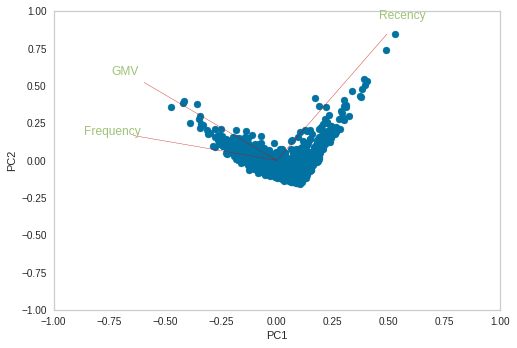

In [ ]:
myplot(pca_result[:,0:3], np.transpose(pca_model.components_[0:3, :]), labels = ["Recency", "Frequency", "GMV"])
plt.show()

In [ ]:
pca_result[:,0:3]

array([[-0.10925351, -0.81205725, -0.51409503],
       [-0.23129813, -0.72855618, -0.3915893 ],
       [-0.02758976,  0.45849078, -0.06161214],
       ...,
       [-1.75534032,  0.42400597,  0.4337831 ],
       [-1.35902307, -0.53299436, -1.93624101],
       [ 0.55305566, -1.01769631,  0.33265169]])

In [ ]:
pca_model.components_[0:2, :]

array([[ 0.49027203, -0.64024462, -0.59137143],
       [ 0.83962499,  0.16493438,  0.51751959]])

# Outlier Check and Remove (Archived Content)

In [ ]:
data_for_model.describe()

,Recency,Frequency,Profit,rfm_score,cluster
count,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000
mean,74.986842,34.937307,1257.424624,280.325077,1.756192
std,108.930000,21.961729,1202.606002,118.705428,1.129219
min,0.000000,1.000000,0.888000,111.000000,0.000000
25%,13.000000,13.000000,317.146950,211.000000,1.000000
50%,36.000000,37.000000,929.838540,311.000000,1.000000
75%,93.000000,54.000000,1824.793725,411.250000,3.000000
max,1063.000000,97.000000,8787.474900,444.000000,3.000000


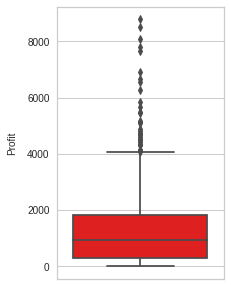

In [ ]:
#showing outliers "Profit"
plt.figure(figsize=(3,5))
sns.boxplot(y=data_for_model.Profit, color ='red');
plt.ylabel('Profit', fontsize=10, labelpad=10);

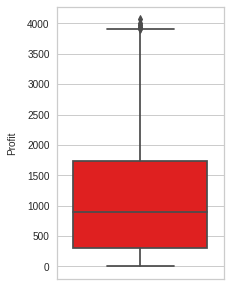

In [ ]:
#Remove Outlier
Q1=317.146950
Q3=1824.793725
IQR = Q3 - Q1

upper_limit= Q3+(1.5*IQR)
lower_limit= Q1-(1.5*IQR)

data_for_model = data_for_model[(data_for_model['Profit'] < upper_limit) & (data_for_model['Profit'] > lower_limit)]

#Showing Boxplot
plt.figure(figsize=(3,5))
sns.boxplot(y=data_for_model.Profit, color ='red');
plt.ylabel('Profit', fontsize=10, labelpad=10);

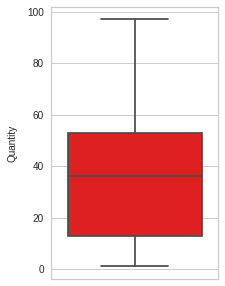

In [ ]:
#showing outliers "Frequency"
plt.figure(figsize=(3,5))
sns.boxplot(y=data_for_model.Frequency, color ='red');
plt.ylabel('Quantity', fontsize=10, labelpad=10);

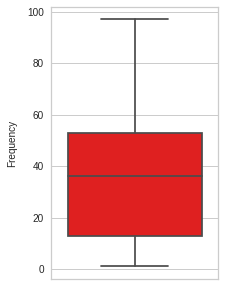

In [ ]:
#Remove Outlier
Q1=13
Q3=54
IQR = Q3 - Q1

upper_limit= Q3+(1.5*IQR)
lower_limit= Q1-(1.5*IQR)

data_for_model = data_for_model[(data_for_model['Frequency'] < upper_limit) & (data_for_model['Frequency'] > lower_limit)]

#Showing Boxplot
plt.figure(figsize=(3,5))
sns.boxplot(y=data_for_model.Frequency, color ='red');
plt.ylabel('Frequency', fontsize=10, labelpad=10);

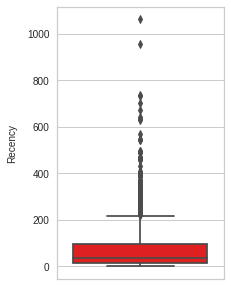

In [ ]:
#showing outliers "Recency"
plt.figure(figsize=(3,5))
sns.boxplot(y=data_for_model.Recency, color ='red');
plt.ylabel('Recency', fontsize=10, labelpad=10);

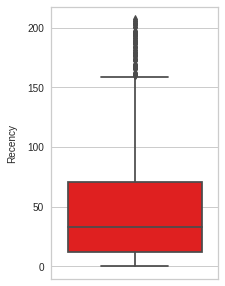

In [ ]:
#Remove Outlier
Q1=13
Q3=93
IQR = Q3 - Q1

upper_limit= Q3+(1.5*IQR)
lower_limit= Q1-(1.5*IQR)

data_for_model = data_for_model[(data_for_model['Recency'] < upper_limit) & (data_for_model['Recency'] > lower_limit)]

#Showing Boxplot
plt.figure(figsize=(3,5))
sns.boxplot(y=data_for_model.Recency, color ='red');
plt.ylabel('Recency', fontsize=10, labelpad=10);

In [ ]:
data_for_model.describe()

,Recency,Frequency,Profit,rfm_score,cluster
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,48.898601,36.507867,1207.113461,293.565559,1.799825
std,49.541293,21.301443,972.101993,112.033409,1.151347
min,0.000000,3.000000,0.888000,111.000000,0.000000
25%,12.000000,15.000000,365.488500,221.000000,1.000000
50%,33.000000,40.000000,995.570490,322.000000,1.000000
75%,71.000000,54.000000,1821.406680,421.000000,3.000000
max,207.000000,97.000000,4067.822540,444.000000,3.000000
